# Productiefouten batterijen

### Setup

In [ ]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy import stats
from hulpfuncties import *

from IPython.core.display import display
from IPython.core.interactiveshell import InteractiveShell


### Opgave

In een fabriek worden batterijen voor smartphones gefabriceerd. De vraag naar deze batterijen varieert
nogal sterk. Men heeft het vermoeden dat als de vraag (en dus ook de productie) stijgt, het percentage
ontploffende batterijen ook stijgt (en dus: de kwaliteit daalt onder de werkdruk). Dit wil men verifiëren.
Er wordt een meting gedaan. Iedere dag wordt het aantal geproduceerde batterijen bijgehouden. Als er een
defecte batterij terug wordt gebracht (of er een ontploft), wordt nagegaan op welke dag deze geproduceerd
werd. De data vind je terug in het bestand "batterijen.csv".
De eerste kolom geeft weer hoeveel er geproduceerd werd en de tweede kolom laat zien hoeveel batterijen
er defect waren.

1. Lees het bestand in. Er zijn lijnen met meer dan 2 waarden. Bekijk wat Python hiermee doet als je de
waarden inleest. Verwijder deze lijn uit de data. Er zijn uitschieters in de kolom aantalDefect.
Verwijder deze. Hoeveel rijen hou je nu over?

In [ ]:
batterijen=pd.read_csv("../datasets/batterijen.csv",skiprows=[56],sep=",") # we kregen eerst een foutmelding dat er 3 waarden stonden op lijn 57
batterijen.loc[50:60,:]
len(batterijen)


96

In [ ]:
# we verwijderen nu de uitschieters
batterijenZU=batterijen[~uitschieters(batterijen['aantalDefect'])].copy()
batterijenZU.head()
len(batterijenZU)

93

Er stonden 3 uitschieters in de kolom. Er zijn nog 93 rijen over.

2. Maak een scatterplot van de twee variabelen. Is er een lineair verband?

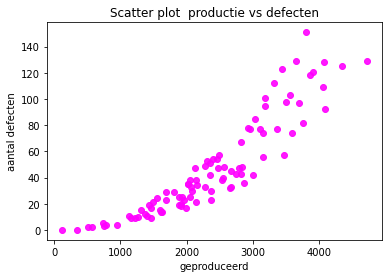

In [ ]:
ax=plt.axes()
_=ax.scatter(x=batterijenZU.geproduceerd,y=batterijenZU.aantalDefect, alpha=0.9, c='magenta')
_=ax.set_title('Scatter plot  productie vs defecten')
_=ax.set_xlabel('geproduceerd')
_=ax.set_ylabel('aantal defecten')
plt.show()
#Er is eerder een niet-lineair verband.

3. Welke correlatie vind je met de methode van Kendall?

In [ ]:
batterijenZU.corr(method='kendall')

,geproduceerd,aantalDefect
geproduceerd,1.000000,0.814006
aantalDefect,0.814006,1.000000


0.814 een hoge correlatie

4. Eigenlijk zijn we niet geïnteresseerd in het absolute aantal defecte batterijen, maar wel in het
percentage. Deel dus het aantal defecte door het aantal geproduceerde batterijen. Wat is het
gemiddeld percentage defecte batterijen?

In [ ]:
batterijenZU['percDefect']=batterijenZU['aantalDefect']/batterijenZU['geproduceerd']*100
batterijenZU.percDefect.mean() # gemiddelde percentages kapotte batterijen


1.7060941708921773

5. Maak terug een scatterplot met het percentage defecte batterijen. Zie je het verschil met de vorige
grafiek?

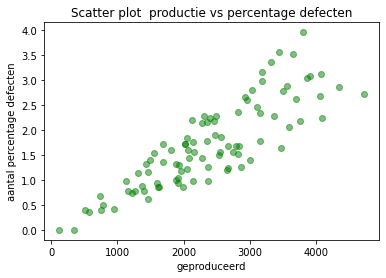

In [ ]:
ax1=plt.axes()
_=ax1.scatter(x=batterijenZU.geproduceerd,y=batterijenZU.percDefect, alpha=0.5, c='green')
_=ax1.set_title('Scatter plot  productie vs percentage defecten')
_=ax1.set_xlabel('geproduceerd')
_=ax1.set_ylabel('aantal percentage defecten')
plt.show()

# Nu is er wel mogelijke een lineair verband.

6. Bereken nu de correlatie tussen het aantal geproduceerde batterijen en het percentage defecte batterijen. Wat besluit je?

In [ ]:
R=batterijenZU.geproduceerd.corr(batterijenZU.percDefect, method='pearson')

7. Wat is de waarde van R²? Wat betekent dit?

In [ ]:
R*R

0.723025738257096

72% van het percentage defecten is te verklaren door het geproduceerde aantal

8. Teken de regressielijn bij de scatterplot. Wat zijn de waarden voor slope en intercept?

In [ ]:
#oplossing m.b.v. Scikit Learn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regr = LinearRegression()
train_data=np.array(batterijenZU.geproduceerd).reshape(-1, 1)
train_target=np.array(batterijenZU.percDefect)
regr.fit(train_data,train_target)
print("R2 score voor training data=",regr.score(train_data,train_target))
print("coefficient=",regr.coef_)
print("intercept=",regr.intercept_)




LinearRegression()

R2 score voor training data= 0.7230257382570955
coefficient= [0.00074391]
intercept= -0.055871712509944604


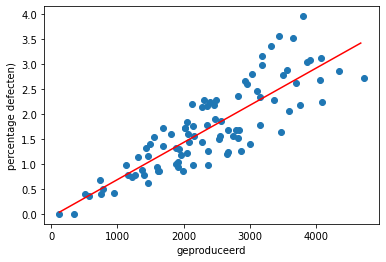

In [ ]:
# plotten van de gegevens
_=plt.figure()
ax=plt.axes()
_=ax.scatter(batterijenZU.geproduceerd,batterijenZU.percDefect)
#plot regressielijn
xx = np.arange(batterijenZU.geproduceerd.min(), 
               batterijenZU.geproduceerd.max(),
    (batterijenZU.geproduceerd.max()-batterijenZU.geproduceerd.min())/100)
yy = regr.predict(xx.reshape(-1,1))
#plot band
_=ax.plot(xx, yy, color="red")
_=ax.set_xlabel("geproduceerd")
_=ax.set_ylabel("percentage defecten)")
plt.show()

9. Wat is de standaardschattingsfout? Wat betekent dit?

In [ ]:
se = m.sqrt(((regr.predict(train_data)-train_target)**2).mean())
print("standaardschattingsfout",se)
# geeft idee van de gemiddelde fout die we maken als we het model gebruiken

standaardschattingsfout 0.4493474606782797


10. Als de productie opgedreven zou worden tot 8000 batterijen/dag. Hoeveel defecte batterijen zou je
dan verwachten?

In [ ]:
pred=regr.predict([[8000]])
print(pred*8000/100)

[471.63132568]


11. Hoeveel batterijen kan de fabriek per dag produceren zodat er hoogstens 1 procent defect is?

In [ ]:
# 1=regr.intercept_+regr.coef_*totaalaantal
# 1-regr.intercept_=regr.coef*totaalaantal
# (1-regr.intercept_)/regr.coef=totaalaantal
print(f"productie1procent= {(1-regr.intercept_)/regr.coef_}")

productie1procent= [1419.35809217]


Met de polyfit krijgen we dezelfde antwoorden op vragen 8 en 9 zie hieronder:

In [ ]:
# we gaan eerst het regressiemodel opstellen en de coefficienten a en b bepalen
x=batterijenZU.geproduceerd
y=batterijenZU.percDefect
model=np.polyfit(x,y,1) # de 1 duidt op een lineair verband
print(model)

[ 0.00074391 -0.05587171]


In [ ]:
b,a=model # a is intercept (afkapwaarde op de y-as) en b is de slope(richtingscoefficient)

In [ ]:
print(f"intercept ={a}")
print(f"slope ={b}")

intercept =-0.05587171250994515
slope =0.0007439079104402145


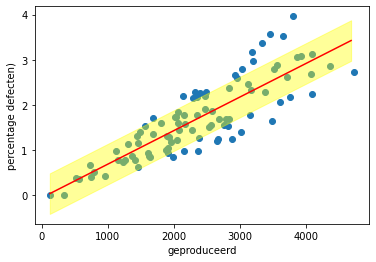

In [ ]:
#kan ook op polyfit manier
predict = np.poly1d(model) #predict is een functie gebaseerd op het model en stelt de recht voor
se = m.sqrt(((predict(x)-y)**2).mean()) # dit is de standaard schattingsfout!!
fig=plt.figure()
ax1=plt.axes()
_=ax1.scatter(x, y)
_=ax1.fill_between(xx, yy-se, yy+se, color="yellow",alpha=0.4)
_=ax1.plot(xx, yy, color="red")
_=ax1.set_xlabel("geproduceerd")
_=ax1.set_ylabel("percentage defecten)")
plt.show()